In [2]:
import os

import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers

import raw_data_loader as data_loader

import model_runner

In [3]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
edfs_path = "../../../dataverse_files"
save_path = '../../../Results/FCNN'

In [5]:
signal_segment_len = 5.0
data_split_ratio = 0.2
seed=1337

learning_rate = 0.001
epochs_n = 150
patience = 25
batch_size = 32
validation_split = 0.2

input_shape=None

### Loading data from edf files, segmenting and splitting to train and test datasets

In [6]:
X_train, X_test, y_train, y_test = data_loader.load_and_split_data(edfs_path, signal_segment_len, data_split_ratio, seed)

Not setting metadata
5771 matching events found
No baseline correction applied
0 bad epochs dropped

Epochs number per patient:  [185, 182, 182, 185, 189, 186, 182, 182, 181, 223, 183, 180, 193, 173, 169, 229, 192, 241, 178, 148, 269, 182, 237, 170, 272, 217, 227, 434]

negative:  3165
positive:  2606

X_train shape: (4616, 1250, 19)
X_test shape: (1155, 1250, 19)

input shape: (1250, 19)


In [7]:
input_shape = data_loader.input_shape
input_shape

(1250, 19)

## Models

In [18]:
from tensorflow.keras import layers

def build_model_FCNN(input_shape, opt):    
    model = Sequential()
    
    model.add(Flatten(input_shape=input_shape))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'FCNN'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

In [ ]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_FCNN, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

batch size: 32
learning rate: 0.001
epochs: 150
Model: "FCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 23750)             0         
                                                                 
 dense_25 (Dense)            (None, 256)               6080256   
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (D

In [8]:
from tensorflow.keras import layers

def build_model_FCNN(input_shape, opt):    
    model = Sequential()
    
    model.add(Flatten(input_shape=input_shape))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'FCNN'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

batch size: 32
learning rate: 0.001
epochs: 150
Model: "FCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 23750)             0         
                                                                 
 dense (Dense)               (None, 256)               6080256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dr

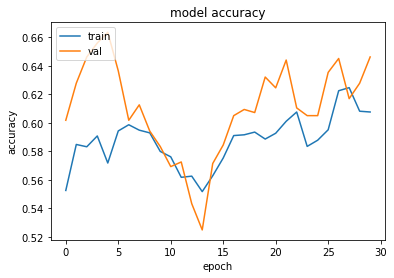

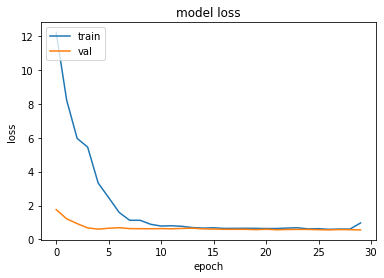

Test Accuracy: 0.6398268398268399
F1 score: 0.5478260869565218


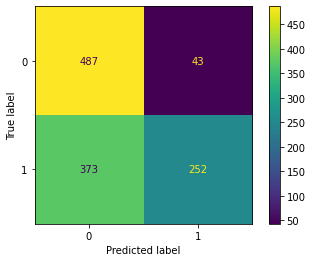

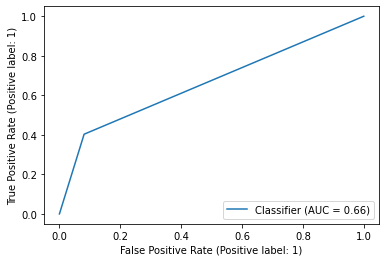

In [9]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_FCNN, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)